# AD-DWT (Anisotropic Diffusion Discrete Wavelet Transform)

Esta transformada intenta reducir la entropía de las subbandas de alta frecuencia de la transformada clásica DWT. 

Todas las DWTs (la clásica y la AD-DWT) de un nivel transforman, en el caso de una imagen, dicha imagen en 4 subbandas de frequencia: LL, LH, HL, HH, donde L=Low y H=High. Por tanto, LL contiene una versión filtrada y submuestreada de la imagen original, que aquí se la llamado Y, y LH, HL y HH contienen las frecuencias en horizontal, vertical y diagonal de Y, que no están ya en LL.

Como ya se ha dicho, la única diferencia entre la DWT (normal) y la AD-DWT es que en esta segunda se usaría ADF (Anisotropic Diffusion Filtering) sobre la subbanda LL para generar una predicción para los coeficientes de las subbandas LH, HL y HH, que en su formato "extendido" está representado por H.

Como se puede apreciar, la salida de la AD-DWT (como en el resto de transformadas DWT) son 4 subbandas LL, LH, HL y HH, y en principio, salvo errores por redondeo si no se trabaja con aritmética entera, debería ser completamente reversible (esto aquí no se ha comprobado).

A continuacion de describe la transformada directa.

```
                                                                                  +----+
                     +--------------------------+-------------------------------->| LL |
                     |                      (3) | iDWT                            +----+
                     |                          v (LL, 0, 0, 0)
+---------+        +-+--+----+             +---------+
|         | DWT(Y) | LL | LH |             |	     |
|    Y    |------->+----+----+             |   LL2   |
|         |   (1)  | HL | HH |             |	     |
+---------+        +----+----+             +---------+
                    (2) | iDWT              (4) | ADF(LL2)
                        v (0, LH, HL, HH)       v
                   +---------+             +---------+
                   |         |             |	     |
                   |    H    |             |   LL2f  |
                   |         |             |         |
                   +---------+             +---------+
                        |                   (5) | DWT(LL2f)
                        |                       v
                        |                  +----+----+
                        |                  | ll | lh |
                        |                  +----+----+
                        |                  | hl | hh |
                        |                  +----+----+
                        |                   (6) | iDWT
                        |                       v (0, lh, hl, hh)
                        |                  +---------+		 
                        |                  |	     |
                        |                  |    Hf   |----+
                        |                  |	     |    |    +---------+        +----+----+
                        |                  +---------+    v    |         | DWT    |  0 | LHf|
                        |                            (7) sub ->|   H_Hf  |------->+----+----+
                        |                                 ^    |         | (H_Hf) | HLf| HHf|
                        |                                 |    +---------+   (8)  +----+----+
                        +---------------------------------+

```

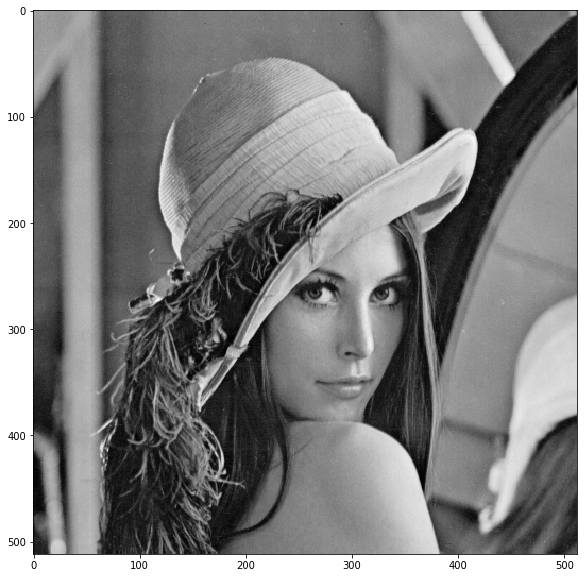

In [39]:
import urllib.request
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.stats as st

HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/lena.png')
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)
BGR = cv2.imdecode(arr,-1)
Y = cv2.cvtColor(BGR, cv2.COLOR_BGR2YCrCb)[:,:,0]
plt.figure(figsize = (10,10))
plt.imshow(Y, cmap="gray")

\# Applicamos ADF, sólo por ver qué pinta tiene la imagen filtrada ... luego comenzamos con el cálculo de la AD-DWT.

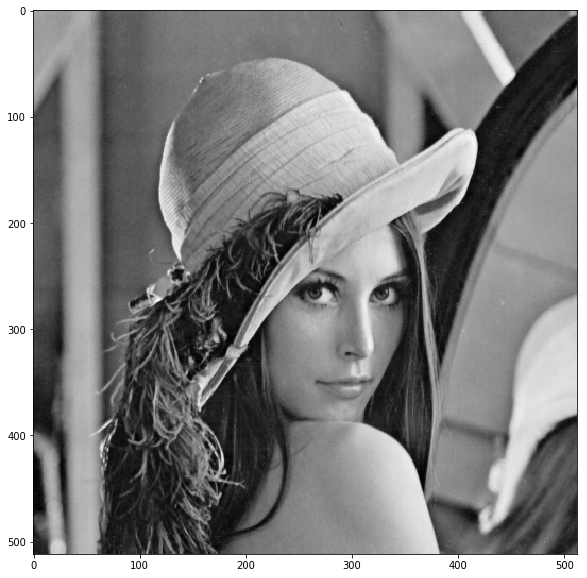

In [2]:
from medpy.filter.smoothing import anisotropic_diffusion
Y_filtered = anisotropic_diffusion(Y)
plt.figure(figsize = (10,10))
plt.imshow(Y_filtered, cmap="gray")

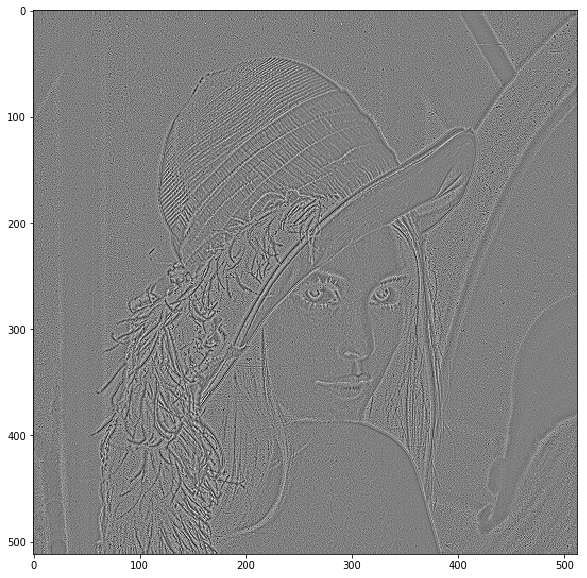

In [3]:
diff = Y_filtered - Y
plt.figure(figsize = (10,10))
plt.imshow(diff, cmap="gray")

\# ... y vemos que efectivamente se ha eliminado información (la imagen original y la filtrada no son iguales).

## AD-DWT (un experimento)

In [4]:
import pywt

# Sólo por ver los distintos filtros que hay disponibles
print (pywt.wavelist())

# Seleccionamos una en concreto 
#wavelet = 'db9' # http://wavelets.pybytes.com/wavelet/db9/
#wavelet = 'haar'
wavelet='bior3.5'

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'haar', 'mexh', 'morl', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'shan', 'sym2', 'sym3

In [5]:
# (1) Calculamos la DWT estándar de la imagen
LL, (LH, HL, HH) = pywt.dwt2(Y, wavelet)

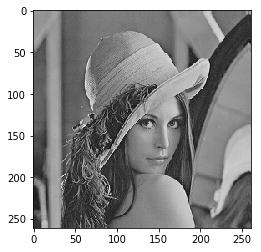

In [6]:
# Por pura curiosidad miramos las subbandas ...
plt.imshow(LL, cmap='gray')

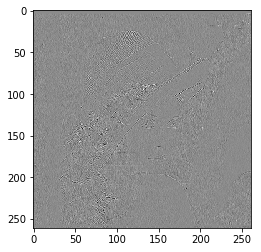

In [7]:
plt.imshow(LH, cmap='gray')

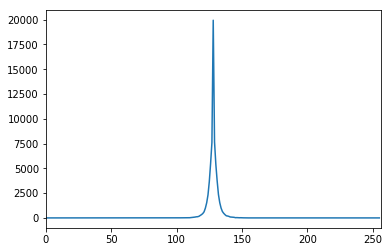

In [8]:
# ... y visualizamos su histograma
hist = cv2.calcHist([LH.astype('uint8')+128], [0], None, [256], [0, 256])
plt.plot(hist)
plt.xlim([0,256])
plt.show()

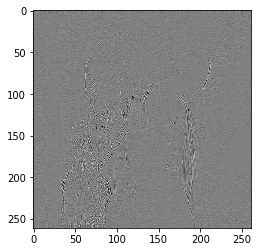

In [9]:
plt.imshow(HL, cmap='gray')

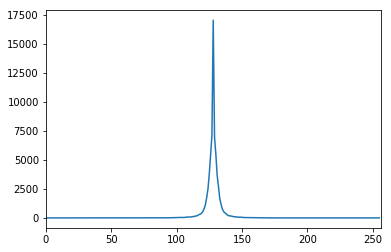

In [10]:
hist = cv2.calcHist([HL.astype('uint8')+128], [0], None, [256], [0, 256])
plt.plot(hist)
plt.xlim([0,256])
plt.show()

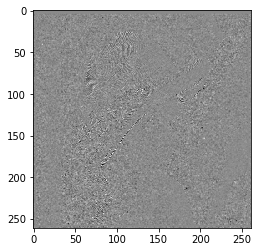

In [11]:
plt.imshow(HH, cmap='gray')

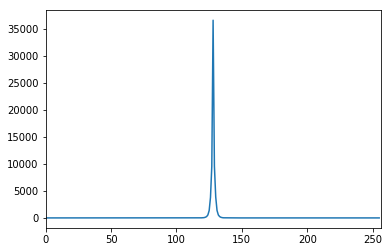

In [12]:
hist = cv2.calcHist([HH.astype('uint8')+128], [0], None, [256], [0, 256])
plt.plot(hist)
plt.xlim([0,256])
plt.show()

In [13]:
# Definimos una matriz de ceros con las dimensiones de una subbanda. Nos va a servir para interpolar
# y para encontrar la representación no crítica (en 3 subbandas LH, HL y HH) para la subbanda H.
zero_subband = np.zeros(HH.shape, np.float64)

In [14]:
# (2) Generamos la subbanda H (representación no crítica de LH, HL y HH).
H = pywt.idwt2((zero_subband, (LH, HL, HH)), wavelet)

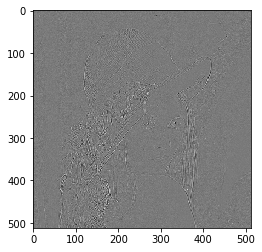

In [15]:
plt.imshow(H, cmap='gray')

In [16]:
# (3) Generamos la versión interpolada de LL.
H_zero = (zero_subband, zero_subband, zero_subband)
LL2 = pywt.idwt2((LL, H_zero), wavelet)

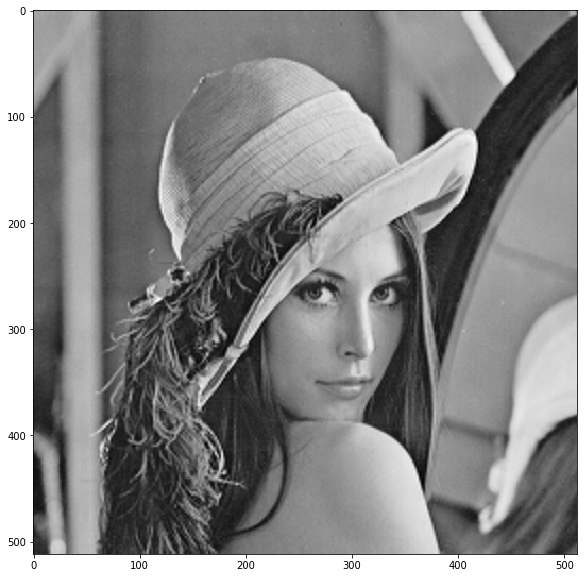

In [17]:
plt.figure(figsize = (10,10))
plt.imshow(LL2, cmap='gray')

In [18]:
# (4) Aplicamos ADF.
LL2f = anisotropic_diffusion(LL2)

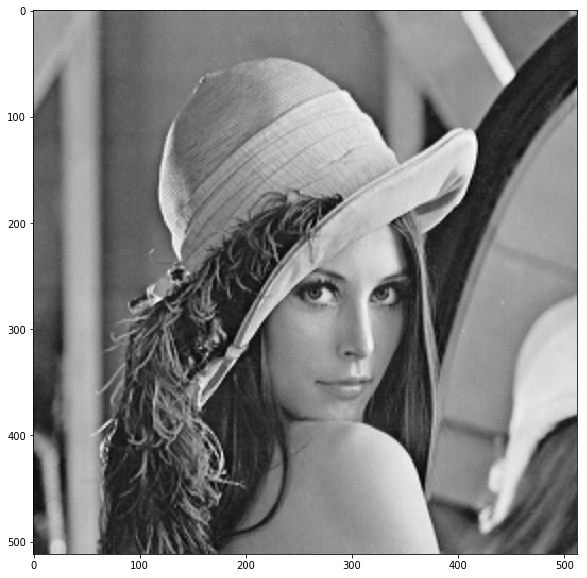

In [19]:
# LL2 filtrada.
plt.figure(figsize = (10,10))
plt.imshow(LL2f, cmap='gray')

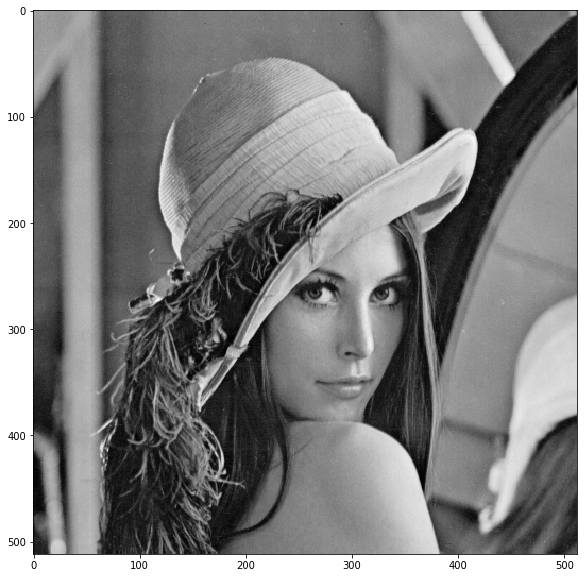

In [20]:
# Imagen original.
plt.figure(figsize = (10,10))
plt.imshow(Y, cmap='gray')

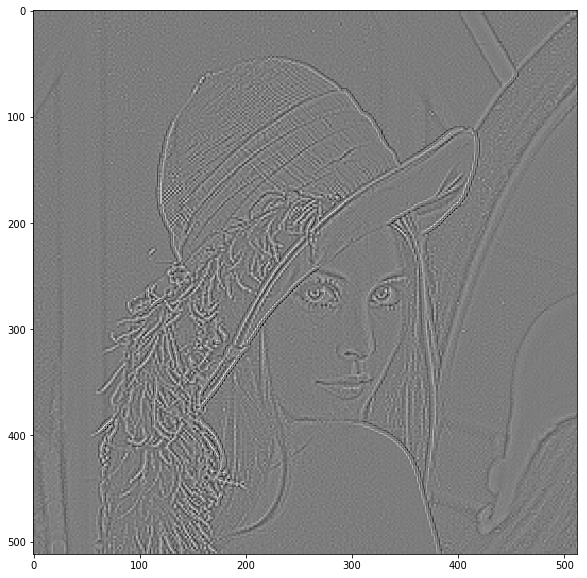

In [21]:
# Información eliminada por el filtrado.
diff = LL2 - LL2f
plt.figure(figsize = (10,10))
plt.imshow(diff, cmap='gray')

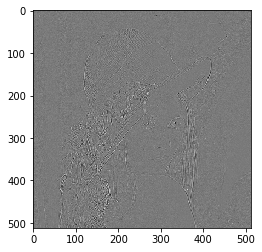

In [22]:
# Diferencias entre la imagen original y la interpolada con la mitad de las bajas frecuencias.
diff_1 = Y - LL2
plt.imshow(diff_1, cmap='gray')

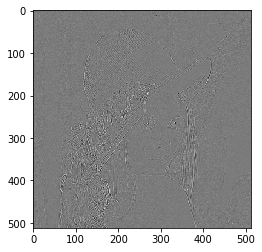

In [23]:
# Diferencieas entre la imagen origina y la interpolada + filtrada con ADF.
diff_2 = Y - LL2f
plt.imshow(diff_2, cmap='gray')

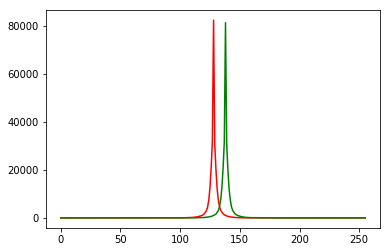

In [24]:
# Ambos residuos parecen idénticos, sin embargo no lo son ...
hist_1 = cv2.calcHist([diff_1.astype('uint8')+128], [0], None, [256], [0, 256])
plt.plot(hist_1, color = 'r')
hist_2 = cv2.calcHist([diff_2.astype('uint8')+138], [0], None, [256], [0, 256])
plt.plot(hist_2, color = 'g')
#plt.xlim([0,256])
#plt.ylim([0,10000])
plt.show()

In [25]:
# En teoría, entropy_2 debería ser menor o igual que entropy_1. Esto significaría que
# el ADF mejoraría el parecido entre LL2 e Y. Sin embargo, con este filtro DWT, no es así.
# Para otras transformadas DWT sí que se cumple que entropy_2 < entropy_1. Sin
# embargo, este no es el fin último de la AD-DWT, que es reducir la entropía de H_Hf.
entropy_1 = st.entropy(hist_1)[0]
entropy_2 = st.entropy(hist_2)[0]
print("Entropy_1={} Entropy_2={}".format(entropy_1, entropy_2))

Entropy_1=2.472740888595581 Entropy_2=2.487436294555664


In [26]:
# (5) Calulamos la DWT de la imagen LL2f. En los coeficientes de alta frecuencia
# (subbandas) lh, hl y hh tenemos los efectos del ADF. ll se descartará.
ll, (lh, hl, hh) = pywt.dwt2(LL2f, wavelet)

In [27]:
# (6) Encontramos la representación no crítica de lh, hl y hh.
Hf = pywt.idwt2((zero_subband, (lh, hl, hh)), wavelet)

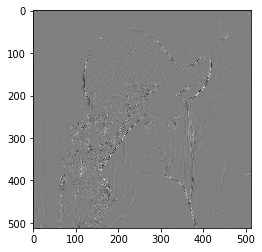

In [28]:
plt.imshow(Hf, cmap='gray')

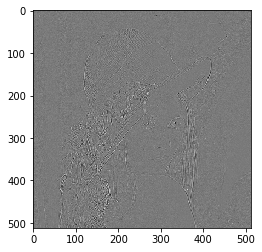

In [29]:
plt.imshow(H, cmap='gray')

In [30]:
# (7) restamos a la subbanda H (generada por la DWT estándar) la subbnda Hf
# (generada a partir de LL y el ADF).
H_Hf = H - Hf

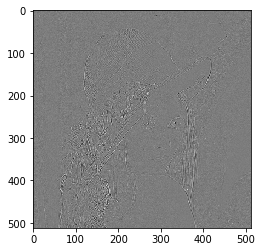

In [31]:
plt.imshow(H_Hf, cmap='gray')

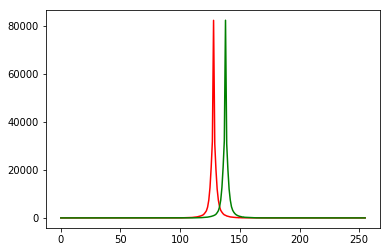

In [32]:
# Calculamos los histogramas de ambas subbandas H (la que queremos mejorar)
# y H_Hf (la mejorada).
hist_1 = cv2.calcHist([H.astype('uint8')+128], [0], None, [256], [0, 256])
plt.plot(hist_1, color = 'r')
hist_2 = cv2.calcHist([H_Hf.astype('uint8')+138], [0], None, [256], [0, 256])
plt.plot(hist_2, color = 'g')
#plt.xlim([0,256])
#plt.ylim([0,10000])
plt.show()

In [33]:
# De nuevo, los histogramas son muy parecidos y es mejor mirar las entropías.
# Ahora sí ocurre que entropy_2 (la entropía de H_Hf) es menor que entropy_1
# (la entropía de H).
entropy_1 = st.entropy(hist_1)[0]
entropy_2 = st.entropy(hist_2)[0]
print("Entropy_1={} Entropy_2={}".format(entropy_1, entropy_2))

Entropy_1=2.472740888595581 Entropy_2=2.4652910232543945


In [34]:
# (8) Calculamos la representación crítica para H_Hf. 
LLf, (LHf, HLf, HHf) = pywt.dwt2(H_Hf, wavelet)

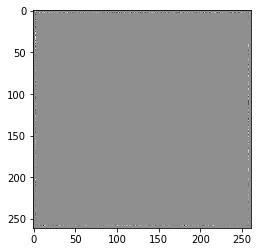

In [35]:
# La subbanda LLf debería ser 0. Si aparece energía probablemente se deba a que 
# los filtros de la DWT introducen un error por redondeo al tratarse de filtros
# con coeficientes reales.
plt.imshow(LLf, cmap="gray")

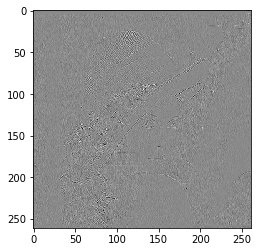

In [36]:
plt.imshow(LHf, cmap="gray")

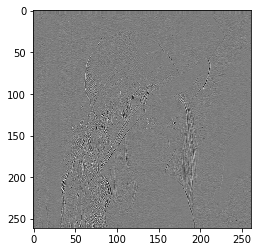

In [37]:
plt.imshow(HLf, cmap="gray")

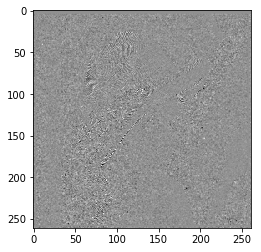

In [38]:
plt.imshow(HHf, cmap="gray")